## Parallelisation

This code uses multiprocessing to speed up the computation time for game runs using multiple processors.

In [16]:
from MG_refactor import MinorityGame, Player
import numpy as np
import random
import matplotlib.pyplot as plt
import itertools

from multiprocessing import Pool, cpu_count
from simulation_mg import run_game
import pandas as pd

In [17]:
# Parallelized function
def simulate_and_plot(N, S, rounds, M):
    results = []
    z = np.exp((np.log(N)-np.log(9))/30)

    num_workers = cpu_count()  # Get number of CPU cores
    pool = Pool(processes=num_workers-2)  # Create a pool of workers

    for i in range(25):
        sigma = []
        n = int(N / (z**i))
        if n % 2 == 0:
            n += 1  # Ensure n is odd

        # Prepare arguments for parallel execution
        args_list = [(n, M, rounds, S) for _ in range(20)]

        # Run the simulations in parallel
        sigma = pool.map(run_game, args_list)

        s = np.average(sigma)
        print(2**M / n, s)
        results.append((2**M / n, s))

    pool.close()
    pool.join()  # Ensure all processes finish before moving forward

    # Convert results to plot
    x_values, y_values = zip(*results)
    plt.figure()
    plt.loglog(x_values, y_values, marker='o', linestyle='-', color='b')
    plt.xlabel(r"$2^M / N$")
    plt.ylabel(r"$\sigma^2 / N$")
    plt.title("Variance of Attendance Normalized by Number of Players")
    plt.grid(True)
    plt.savefig("Normalised variance vs z")
    plt.show()

0.127936031984008 0.6285443603948024
0.15320167564332735 0.49067687567324947
0.18351254480286738 0.3752452443369175
0.21974248927038625 0.31750850180257506
0.263103802672148 0.27245949671120245
0.3148831488314883 0.23647031359163595
0.37702503681885124 0.21491008534609718
0.4514991181657848 0.1974193122574956
0.5412262156448203 0.18543482304439746
0.6481012658227848 0.18275173126582278
0.7734138972809668 0.17523200619335344
0.9309090909090909 0.17690433981818182
1.1082251082251082 0.17820965151515153
1.3264248704663213 0.17791855077720203
1.5900621118012421 0.17989921645962734
1.8962962962962964 0.18280281888888888
2.265486725663717 0.18418760973451326
2.752688172043011 0.18888737419354837
3.240506329113924 0.19174519936708861
3.9384615384615387 0.20420643307692304
4.654545454545454 0.20206205909090907
5.688888888888889 0.20374276555555554
6.564102564102564 0.211545241025641
8.258064516129032 0.2198753548387097
9.481481481481481 0.21868365555555552


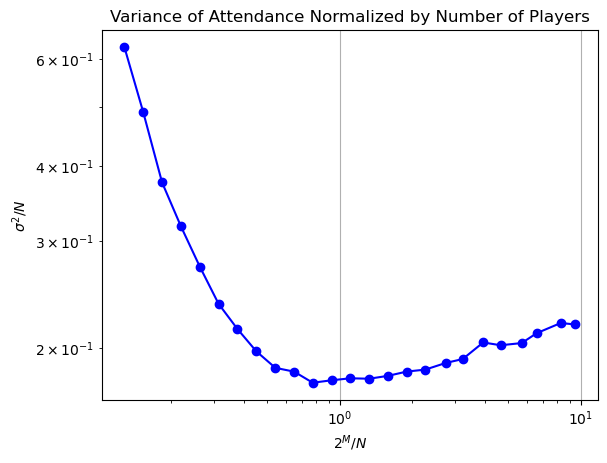

In [18]:
# Example simulation parameters
N = 2001      # Number of players
S = 2       # Number of strategies per player
rounds = 1000
M = 8  # memory

# Ensure multiprocessing runs correctly
if __name__ == "__main__":
    simulate_and_plot(N, S, rounds, M)


0.127936031984008 0.6300570176453649
0.15320167564332735 0.4439537708346798
0.18351254480286738 0.31750495281317204
0.21974248927038625 0.24200388720289703
0.263103802672148 0.16832147197636177
0.3148831488314883 0.10457837309348092
0.37702503681885124 0.07209332674466126
0.4514991181657848 0.06805981784237214
0.5412262156448203 0.06933078630576109
0.6481012658227848 0.07604570092373417
0.7734138972809668 0.08277658000226587
0.9309090909090909 0.09552055475181818
1.1082251082251082 0.10169266982305196
1.3264248704663213 0.11296443492940414
1.5900621118012421 0.12245898282686334
1.8962962962962964 0.13273356981574075
2.265486725663717 0.14130700177323008
2.752688172043011 0.15396297286155916
3.240506329113924 0.1660508410585443
3.9384615384615387 0.16978551402884615
4.654545454545454 0.18696074609772728
5.688888888888889 0.19018282909722223
6.564102564102564 0.1966958977275641
8.258064516129032 0.20916753278629036
9.481481481481481 0.21131780507870368


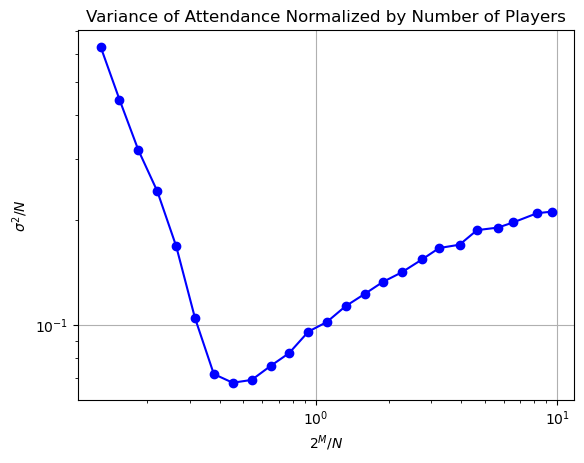

In [19]:
# Example simulation parameters
N = 2001      # Number of players
S = 2       # Number of strategies per player
rounds = 20000
M = 8  # memory

# Ensure multiprocessing runs correctly
if __name__ == "__main__":
    simulate_and_plot(N, S, rounds, M)

In [33]:
N=1001
S=2
M_max=8
M_min=2
rounds=10000

game=MinorityGame(N, M_min, M_max, rounds, S, False, False)


In [34]:
game.run()

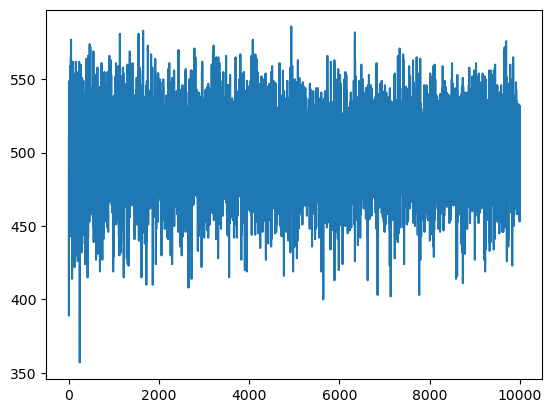

In [35]:
plt.plot(game.attendance)

In [36]:
data = {
    "memory": [player.m for player in game.players],
    "final_points": [player.points for player in game.players],
}

df = pd.DataFrame(data)

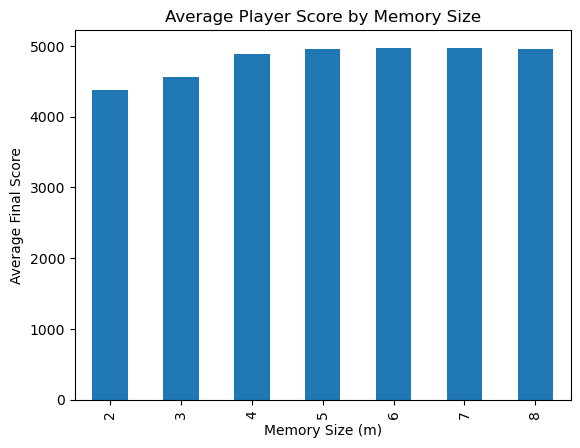

In [37]:
mean_scores = df.groupby("memory")["final_points"].mean()

mean_scores.plot(kind="bar")
plt.xlabel("Memory Size (m)")
plt.ylabel("Average Final Score")
plt.title("Average Player Score by Memory Size")
plt.show()

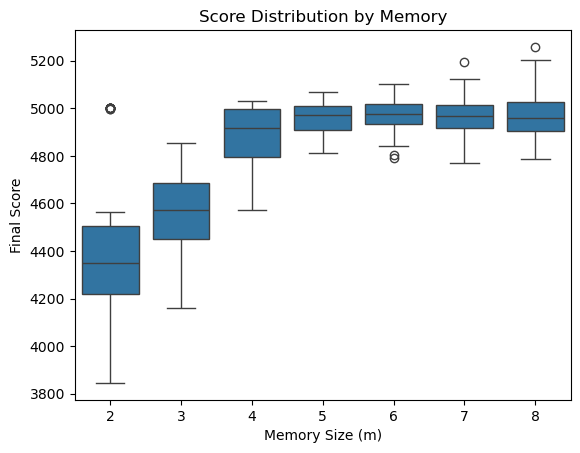

In [38]:
import seaborn as sns

sns.boxplot(x="memory", y="final_points", data=df)
plt.xlabel("Memory Size (m)")
plt.ylabel("Final Score")
plt.title("Score Distribution by Memory")
plt.show()